### Bayesian Data Analysis, 3rd ed
##  Chapter 5, demo 2

Hierarchical model for SAT-example data (BDA3, p. 102).

In [1]:
import numpy as np
from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os, sys
# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)
# apply custom background plotting style
plt.style.use(plot_tools.custom_styles['gray_background'])

In [4]:
# SAT-example data (BDA3 p. 120)
# y is the estimated treatment effect
# s is the standard error of effect estimate
y = np.array([28,  8, -3,  7, -1,  1, 18, 12])
s = np.array([15, 10, 16, 11,  9, 11, 10, 18])
M = len(y)

In [5]:
# load the pre-computed results for the hierarchical model
# replace this with your own code in Ex 5.1*
hres_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'demo5_2.npz'
    )
)
hres = np.load(hres_path)
''' Content information of the precalculated results:
name  shape      dtype
------------------------
pxm   (8, 500)   float64
t     (1000,)    float64
tp    (1000,)    float64
tsd   (8, 1000)  float64
tm    (8, 1000)  float64
'''
pxm = hres['pxm']
t   = hres['t']
tp  = hres['tp']
tsd = hres['tsd']
tm  = hres['tm']
hres.close()

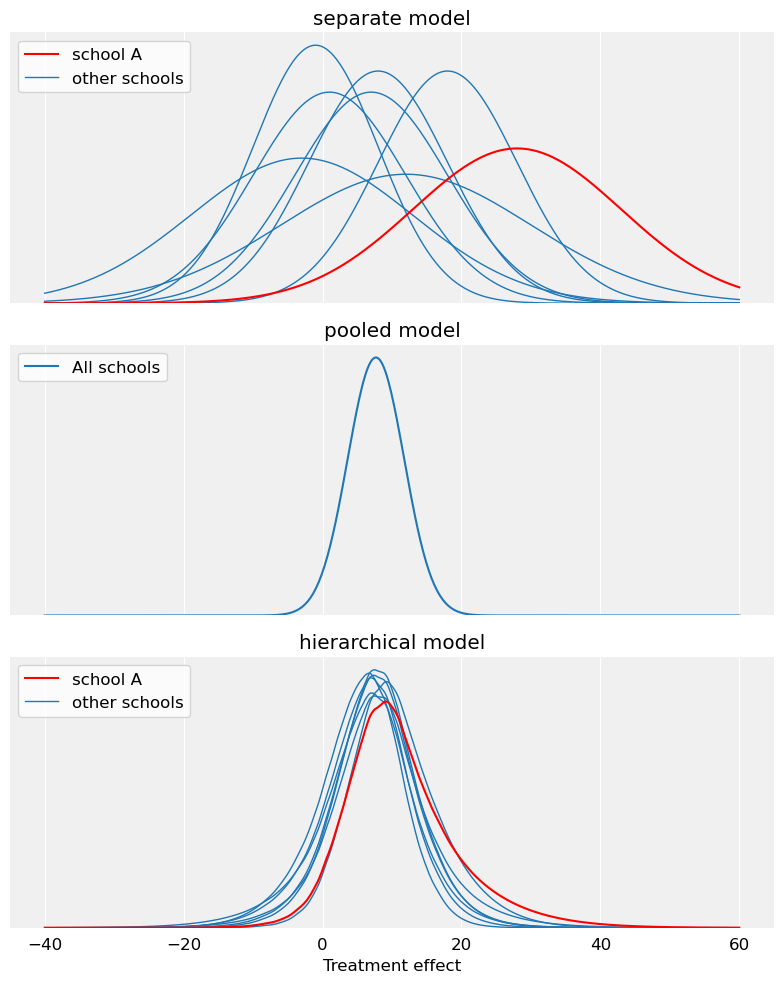

In [6]:
# plot the separate, pooled and hierarchical models
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 10))
x = np.linspace(-40, 60, 500)

# separate
ax = axes[0]
lines = ax.plot(
    x,
    norm.pdf(x[:,None], y[1:], s[1:]),
    color='C0',
    linewidth=1
)
line, = ax.plot(x, norm.pdf(x, y[0], s[0]), color='red')
ax.legend(
    (line, lines[0]),
    ('school A', 'other schools'),
    loc='upper left'
)
ax.set_yticks(())
ax.set_title('separate model')
ax.set_ylim((0, ax.set_ylim()[1]))  # set y base to zero

# pooled
ax = axes[1]
ax.plot(
    x,
    norm.pdf(
        x,
        np.sum(y/s**2)/np.sum(1/s**2),
        np.sqrt(1/np.sum(1/s**2))
    ),
    label='All schools'
)
ax.legend(loc='upper left')
ax.set_yticks(())
ax.set_title('pooled model')
ax.set_ylim((0, ax.set_ylim()[1]))  # set y base to zero

# hierarchical
ax = axes[2]
lines = ax.plot(x, pxm[1:].T, color='C0',linewidth=1)
line, = ax.plot(x, pxm[0], color='red')
ax.legend(
    (line, lines[0]),
    ('school A', 'other schools'),
    loc='upper left'
)
ax.set_yticks(())
ax.set_title('hierarchical model')
ax.set_xlabel('Treatment effect')
ax.set_ylim((0, ax.set_ylim()[1]))  # set y base to zero

fig.tight_layout()

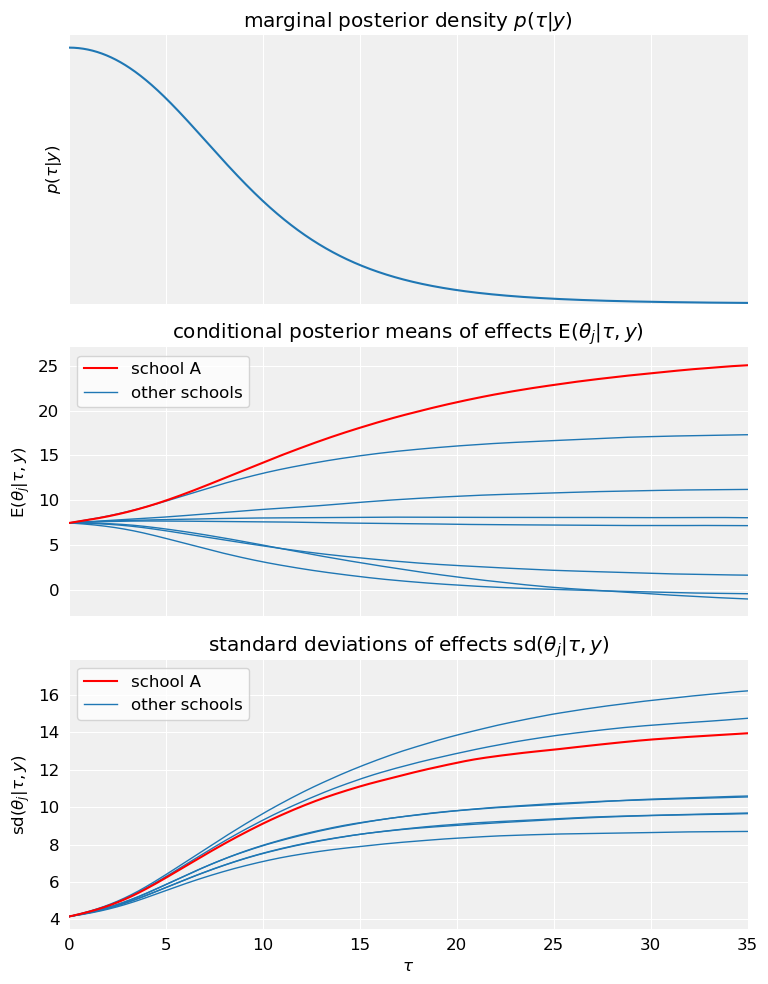

In [7]:
# plot various marginal and conditional posterior summaries
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,10))

axes[0].plot(t, tp)
axes[0].set_yticks(())
axes[0].set_title(r'marginal posterior density $p(\tau|y)$')
axes[0].set_ylabel(r'$p(\tau|y)$')
axes[0].set_xlim([0, 35])
axes[0].set_ylim([0, axes[0].set_ylim()[1]])

lines = axes[1].plot(t, tm[1:].T, color='C0', linewidth=1)
line, = axes[1].plot(t, tm[0].T, color='red')
axes[1].legend(
    (line, lines[1]),
    ('school A', 'other schools'),
    loc='upper left'
)
axes[1].set_title(r'conditional posterior means of effects '
                  r'$\operatorname{E}(\theta_j|\tau,y)$')
axes[1].set_ylabel(r'$\operatorname{E}(\theta_j|\tau,y)$')

lines = axes[2].plot(t, tsd[1:].T, color='C0', linewidth=1)
line, = axes[2].plot(t, tsd[0].T, color='red')
axes[2].legend(
    (line, lines[1]),
    ('school A', 'other schools'),
    loc='upper left'
)
axes[2].set_title(r'standard deviations of effects '
                  r'$\operatorname{sd}(\theta_j|\tau,y)$')
axes[2].set_ylabel(r'$\operatorname{sd}(\theta_j|\tau,y)$')
axes[2].set_xlabel(r'$\tau$')

fig.tight_layout()